In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

# Load dataset
df = pd.read_csv("Netflix Movie Recomendations.csv", encoding='latin1')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Shape & info
print(df.shape)
df.info()

# Handling missing values
df = df.fillna("Unknown")

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Clean duration column
def convert_duration(x):
    x = str(x)
    numbers = re.findall(r'\d+', x)
    return int(numbers[0]) if numbers else 0

df['duration_num'] = df['duration'].apply(convert_duration)

df.head()

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


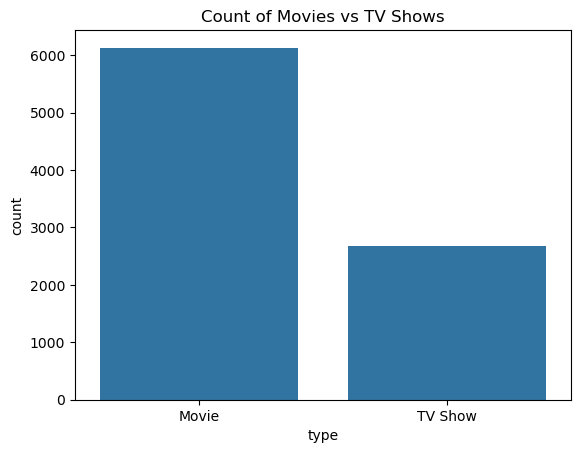

In [3]:
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.show()

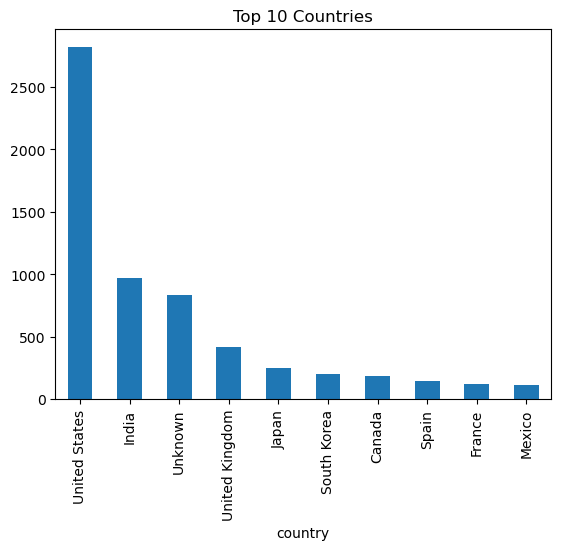

In [4]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries")
plt.show()

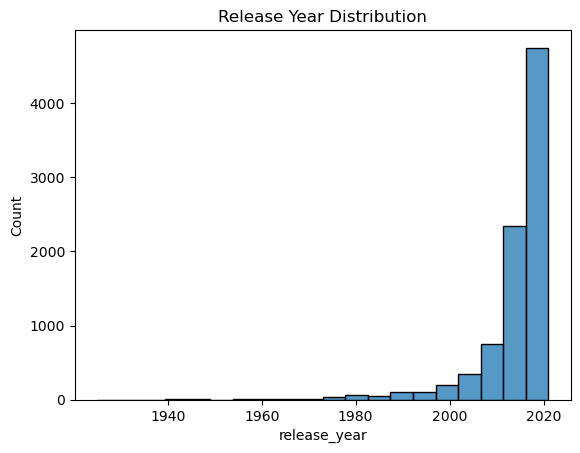

In [5]:
sns.histplot(df['release_year'], bins=20)
plt.title("Release Year Distribution")
plt.show()

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemma.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_desc'] = df['description'].apply(preprocess)
df[['description','clean_desc']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,description,clean_desc
0,"As her father nears the end of his life, filmm...",father nears end life filmmaker kirsten johnso...
1,"After crossing paths at a party, a Cape Town t...",crossing path party cape town teen set prove w...
2,To protect his family from a powerful drug lor...,protect family powerful drug lord skilled thie...
3,"Feuds, flirtations and toilet talk go down amo...",feud flirtation toilet talk go among incarcera...
4,In a city of coaching centers known to train I...,city coaching center known train india finest ...


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score > 0 else 0  # positive = 1, negative = 0

df['sentiment'] = df['description'].apply(get_sentiment_vader)
df[['description','sentiment']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...


,description,sentiment
0,"As her father nears the end of his life, filmm...",0
1,"After crossing paths at a party, a Cape Town t...",0
2,To protect his family from a powerful drug lor...,0
3,"Feuds, flirtations and toilet talk go down amo...",1
4,In a city of coaching centers known to train I...,1


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_desc']).toarray()

y = df['sentiment']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log = LogisticRegression(max_iter=2000)
log.fit(X_train, y_train)

y_pred_log = log.predict(X_test)

print("LOGISTIC REGRESSION ACCURACY:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

LOGISTIC REGRESSION ACCURACY: 0.8087400681044268
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       948
           1       0.83      0.73      0.78       814

    accuracy                           0.81      1762
   macro avg       0.81      0.80      0.81      1762
weighted avg       0.81      0.81      0.81      1762



In [12]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM ACCURACY:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM ACCURACY: 0.8047673098751419
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       948
           1       0.83      0.72      0.77       814

    accuracy                           0.80      1762
   macro avg       0.81      0.80      0.80      1762
weighted avg       0.81      0.80      0.80      1762



In [13]:
df.to_csv("Netflix_Project_Output.csv", index=False)
print("File Saved: Netflix_Project_Output.csv")

File Saved: Netflix_Project_Output.csv


In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,clean_desc,sentiment
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,father nears end life filmmaker kirsten johnso...,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,crossing path party cape town teen set prove w...,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,protect family powerful drug lord skilled thie...,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,feud flirtation toilet talk go among incarcera...,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,city coaching center known train india finest ...,1


In [15]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,clean_desc,sentiment
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,political cartoonist crime reporter pair cop i...,0
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,living alone spooky town young girl befriends ...,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,looking survive world taken zombie dorky colle...,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,dragged civilian life former superhero must tr...,0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,scrappy poor boy worm way tycoon dysfunctional...,0


In [16]:
df.shape

(8807, 15)

In [17]:
df['sentiment'].value_counts()

sentiment
0    4696
1    4111
Name: count, dtype: int64

In [18]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.8087400681044268
SVM Accuracy: 0.8047673098751419


In [19]:
from sklearn.metrics import classification_report

print("LOGISTIC REGRESSION REPORT")
print(classification_report(y_test, y_pred_log))

print("SVM REPORT")
print(classification_report(y_test, y_pred_svm))

LOGISTIC REGRESSION REPORT
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       948
           1       0.83      0.73      0.78       814

    accuracy                           0.81      1762
   macro avg       0.81      0.80      0.81      1762
weighted avg       0.81      0.81      0.81      1762

SVM REPORT
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       948
           1       0.83      0.72      0.77       814

    accuracy                           0.80      1762
   macro avg       0.81      0.80      0.80      1762
weighted avg       0.81      0.80      0.80      1762



In [20]:
output_df = pd.read_csv("Netflix_Project_Output.csv")
output_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,clean_desc,sentiment
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,father nears end life filmmaker kirsten johnso...,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,crossing path party cape town teen set prove w...,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,protect family powerful drug lord skilled thie...,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,feud flirtation toilet talk go among incarcera...,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,city coaching center known train india finest ...,1


In [21]:
from IPython.display import display
display(df.head(10))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,clean_desc,sentiment
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,father nears end life filmmaker kirsten johnso...,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,crossing path party cape town teen set prove w...,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,protect family powerful drug lord skilled thie...,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,feud flirtation toilet talk go among incarcera...,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,city coaching center known train india finest ...,1
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,arrival charismatic young priest brings glorio...,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,equestria divided bright eyed hero belief eart...,1
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,photo shoot ghana american model slip back tim...,0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,talented batch amateur baker face week competi...,1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,woman adjusting life loss contends feisty bird...,0


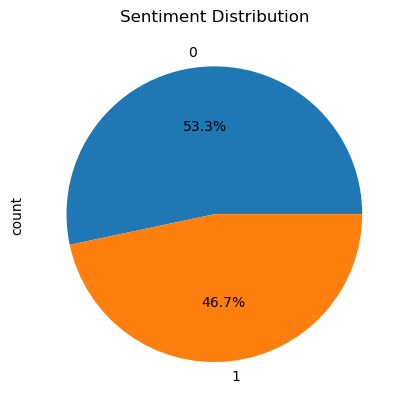

In [22]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.show()

In [23]:
print("=== FINAL PROJECT OUTPUT ===")

print("\nDataset Shape:", df.shape)

print("\nSentiment Counts:")
print(df['sentiment'].value_counts())

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nPreview of Final Dataset:")
display(df.head())

print("\nCSV Export Successful! You can now open Netflix_Project_Output.csv")

=== FINAL PROJECT OUTPUT ===

Dataset Shape: (8807, 15)

Sentiment Counts:
sentiment
0    4696
1    4111
Name: count, dtype: int64

Logistic Regression Accuracy: 0.8087400681044268

SVM Accuracy: 0.8047673098751419

Preview of Final Dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,clean_desc,sentiment
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,father nears end life filmmaker kirsten johnso...,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,crossing path party cape town teen set prove w...,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,protect family powerful drug lord skilled thie...,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,feud flirtation toilet talk go among incarcera...,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,city coaching center known train india finest ...,1



CSV Export Successful! You can now open Netflix_Project_Output.csv
